# <h1 style="font-family:Roboto"><center><b> ♟📊 CHESS PROGNOSTICATOR 📈♟<b></center></h1>
***

<img src='images/workflow.JPG' style = 'display: block;margin-left: auto;  margin-right: auto;width: 100%;'>

***

### Import Necessary Libraries

In [20]:
import cv2
import matplotlib.pyplot as plt
from utils import *

### Set the I/P image to be analyzed

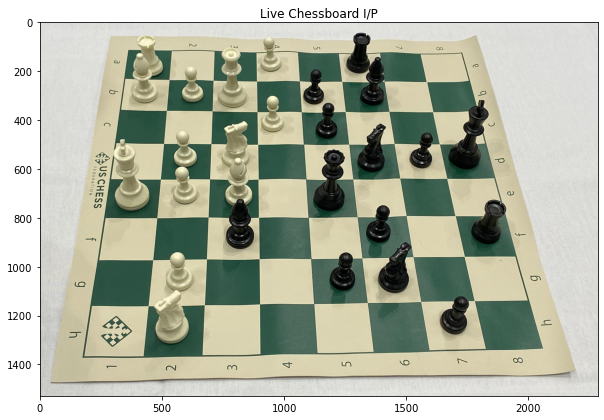

In [21]:
img_path = "images/test_image_1.jpg"
img = cv2.imread(img_path)
plt.figure(figsize=(10,7))
plt.title("Live Chessboard I/P")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

***
# <center>CHESS PIECE DETECTION.</center>
***

<img src = 'images/yolov8.png' style="display: block; margin-left: auto; margin-right: auto; width: 50%;">

We have trained the YOLOv8 model on the Chess Pieces dataset obtained from Roboflow Website. The reference training notebook and dataset links are given below.
- <a href = "https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb"> YOLOv8 Training Colab Notebook </a>

- <a href = "https://public.roboflow.com/object-detection/chess-full"> Chess Pieces Object Detection</a>

Now we shall proceed with the chessboard detection phase of our project.

***
# <center>CHESSBOARD DETECTION.</center>
***
## <b><u>Approach 1:</u> Using the Labelled board</b>

<b>Step-1:</b> Find the Hough Lines

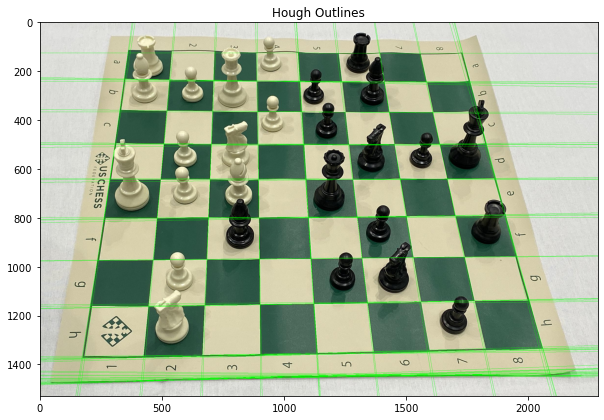

In [33]:
slant_img = find_Hough_Lines(img_path)
plt.figure(figsize=(10,7))
plt.title("Hough Outlines")
plt.imshow(cv2.cvtColor(slant_img, cv2.COLOR_BGR2RGB))

<b>Step-2:</b> Find the Perspective transformation 

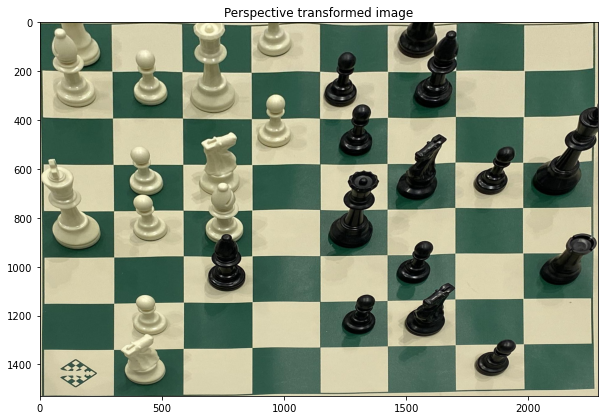

In [34]:
# Find the square boundaries to get the line coordinates.
x_coords, y_start_coords, y_end_coords = find_Square_Boundaries(slant_img)

# Perform the perspective transformation.
img_output, projective_matrix = find_Perspective_Transform(img_path, x_coords, y_start_coords, y_end_coords)

plt.figure(figsize=(10,7))
plt.title("Perspective transformed image")
plt.imshow(cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB))

<b>Step-3:</b> Find the Bottom centers of each piece 

In [35]:
piece_bottom_centers = find_Bottom_Centers(img_path)


image 1/1 c:\Users\hp\Documents\CV PROJECT\images\test_image_1.jpg: 544x800 2 black-bishops, 1 black-king, 2 black-knights, 5 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 6 white-pawns, 1 white-queen, 1 white-rook, 705.9ms
Speed: 10.3ms preprocess, 705.9ms inference, 7.7ms postprocess per image at shape (1, 3, 544, 800)


<b>Step-4:</b> Map the piece bottom centers to the labelled matrix and get the positions dictionary. 

In [36]:
final_pos = find_Positions_from_Labelled_Matrix(img_path, projective_matrix, piece_bottom_centers)
final_pos

{'white-knight': ['h2', 'd3'],
 'black-king': ['d8'],
 'white-king': ['e1'],
 'white-pawn': ['a4', 'b2', 'd2', 'g2', 'e2', 'c4'],
 'black-queen': ['e5'],
 'white-rook': ['a1'],
 'white-bishop': ['b1', 'e3'],
 'white-queen': ['b3'],
 'black-rook': ['f8', 'a6'],
 'black-knight': ['d6', 'g6'],
 'black-pawn': ['c5', 'h7', 'b5', 'g5', 'd7'],
 'black-bishop': ['b6', 'f3']}

<b>Step-5:</b> Get the FEN from the positions dictionary. 

In [37]:
move = 'w' # User I/P in the app.
FEN = get_fen(final_pos, move)
print(f"The FEN for the given board is : {FEN}")

The FEN for the given board is : 3k1r2/3p3p/rb1n2n1/1pp1q1p1/P1P5/1Q1NBb2/1P1PP1PN/RB2K3 w - - 1 9


***
## <b><u>Approach 2:</u> Using the Square's Centers</b>
***

<b>Step-1:</b> Find the Hough Lines

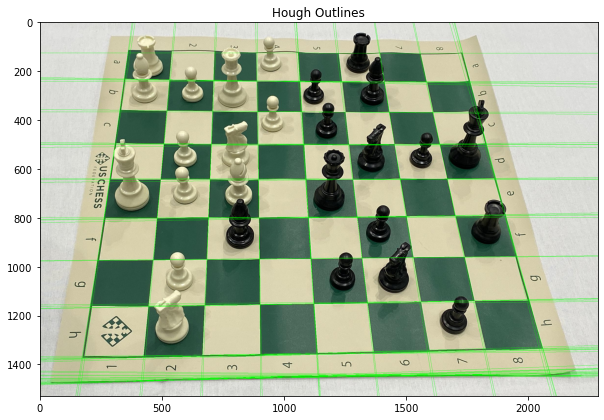

In [38]:
slant_img = find_Hough_Lines(img_path)
plt.figure(figsize=(10,7))
plt.title("Hough Outlines")
plt.imshow(cv2.cvtColor(slant_img, cv2.COLOR_BGR2RGB))

<b>Step-2:</b> Find the Perspective transformation 

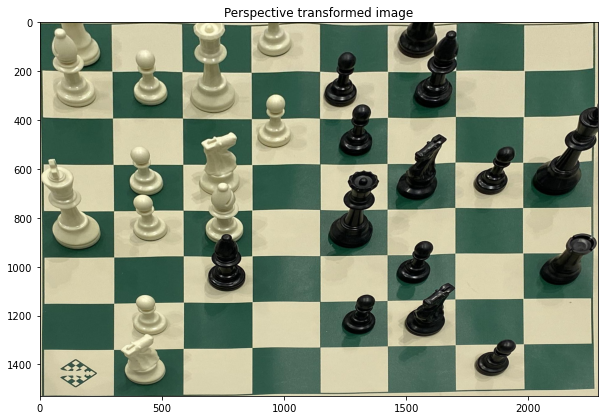

In [39]:
# Find the square boundaries to get the line coordinates.
x_coords, y_start_coords, y_end_coords = find_Square_Boundaries(slant_img)

# Perform the perspective transformation.
img_output, projective_matrix = find_Perspective_Transform(img_path, x_coords, y_start_coords, y_end_coords)

plt.figure(figsize=(10,7))
plt.title("Perspective transformed image")
plt.imshow(cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB))

<b>Step-3:</b> Find the Bottom centers of each piece 

In [40]:
piece_bottom_centers = find_Bottom_Centers(img_path)


image 1/1 c:\Users\hp\Documents\CV PROJECT\images\test_image_1.jpg: 544x800 2 black-bishops, 1 black-king, 2 black-knights, 5 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 6 white-pawns, 1 white-queen, 1 white-rook, 632.4ms
Speed: 8.7ms preprocess, 632.4ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 800)


<b>Step-4:</b> Find the chessboard square's centers 

In [41]:
chess_board_coords = find_ChessBoard_Centers(img_path)

<b>Step-5:</b> Find positions dictionary using the square centers and piece bottom centers

In [42]:
final_pos = find_Positions_from_Board_Centers(projective_matrix, chess_board_coords, piece_bottom_centers)
final_pos

{'white-knight': ['h2', 'd3'],
 'black-king': ['d8'],
 'white-king': ['e1'],
 'white-pawn': ['a4', 'b2', 'd2', 'g2', 'e2', 'c4'],
 'black-queen': ['e5'],
 'white-rook': ['a1'],
 'white-bishop': ['b1', 'e3'],
 'white-queen': ['b3'],
 'black-rook': ['f8', 'a6'],
 'black-knight': ['d6', 'g6'],
 'black-pawn': ['c5', 'h7', 'b5', 'g5', 'd7'],
 'black-bishop': ['b6', 'f3']}

<b>Step-6:</b> Get the FEN from the positions dictionary. 

In [43]:
move = 'w' # User I/P in the app.
FEN = get_fen(final_pos, move)
print(f"The FEN for the given board is : {FEN}")

The FEN for the given board is : 3k1r2/3p3p/rb1n2n1/1pp1q1p1/P1P5/1Q1NBb2/1P1PP1PN/RB2K3 w - - 2 8


#### Now feed this FEN to the StockFish Chess Engine for Analysis of the uploaded chessboard.

# <center>--- END OF NOTEBOOK ---</center>